In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import random

In [4]:
main_dish = pd.read_csv('main_dish.csv')
side_dish = pd.read_csv('side_dish.csv')
kimchi = pd.read_csv('removed_kimchi.csv')
rice = pd.read_csv('removed_rice.csv')
soup = pd.read_csv('removed_soup.csv')

In [5]:
main_dish.head()
# side_dish.head()
# kimchi.head()
# rice.head()
# soup.head()

,RecipeID,Name,식품대분류,식품상세분류,1회제공량(g),calories,carbohydrate,protein,fat,sugar,sodium
0,1,오징어순대,찜류,어패류찜,350,466.86,58.3,45.7,5.6,0.4,1258.71
1,2,대구찜,찜류,어패류찜,500,376.42,24.7,51.7,7.9,5.7,1898.67
2,3,동태찜,찜류,어패류찜,500,394.32,25.8,50.9,9.7,5.7,1985.60
3,4,돼지등갈비찜,찜류,육류찜,450,961.04,57.4,72.1,49.2,24.1,2395.17
4,5,돼지머리고기,찜류,육류찜,200,650.00,3.5,42.4,52.0,0.1,333.64


In [6]:
main_dish['calories']

0      466.86
1      376.42
2      394.32
3      961.04
4      650.00
        ...  
197     84.27
198     37.80
199    100.00
200    113.00
201     99.00
Name: calories, Length: 202, dtype: float64

In [7]:
main_dish.info()
# side_dish.info()
# kimchi.info()
# rice.info()
# soup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   RecipeID      202 non-null    int64  
 1   Name          202 non-null    object 
 2   식품대분류         202 non-null    object 
 3   식품상세분류        202 non-null    object 
 4   1회제공량(g)      202 non-null    int64  
 5   calories      202 non-null    float64
 6   carbohydrate  202 non-null    float64
 7   protein       202 non-null    float64
 8   fat           202 non-null    float64
 9   sugar         202 non-null    float64
 10  sodium        202 non-null    float64
dtypes: float64(6), int64(2), object(3)
memory usage: 17.5+ KB


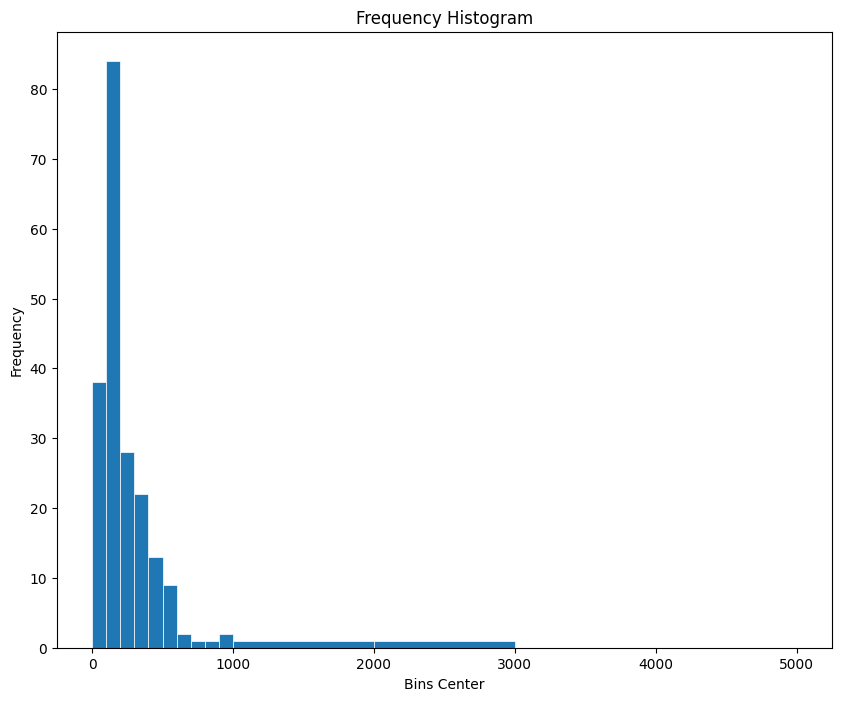

In [8]:
fig, ax = plt.subplots(figsize=(10, 8))
plt.title('Frequency Histogram')
plt.ylabel('Frequency')
plt.xlabel('Bins Center')
ax.hist(main_dish.calories.to_numpy(),bins=[0,100,200,300,400,500,600,700,800,900,1000,1000,2000,3000,5000],linewidth=0.5, edgecolor="white")
plt.show()

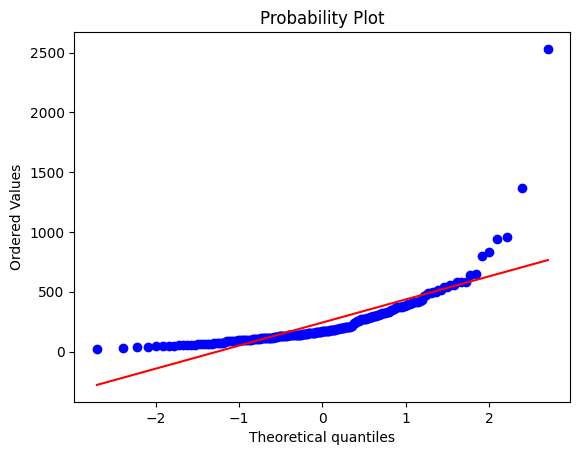

In [9]:
import pylab 
import scipy.stats as stats
stats.probplot(main_dish.calories.to_numpy(), dist="norm", plot=pylab)
pylab.show()

In [10]:
main_dish_dataset=main_dish.copy()
side_dish_dataset=side_dish.copy()
kimchi_dataset=kimchi.copy()
rice_dataset=rice.copy()
soup_dataset=soup.copy()
columns=['RecipeID','Name','calories','carbohydrate','protein','fat','sugar','sodium']
main_dish_dataset=main_dish_dataset[columns]
side_dish_dataset=side_dish_dataset[columns]
kimchi_dataset=kimchi_dataset[columns]
rice_dataset=rice_dataset[columns]
soup_dataset=soup_dataset[columns]

In [11]:
random_meal = []
for i in range(0, 100):
    list = []
    main_random_num = random.randint(1, len(main_dish_dataset.index))
    side_random_num = random.randint(1, len(side_dish_dataset.index))
    rice_random_num = random.randint(1, len(rice_dataset.index))
    kimchi_random_num = random.randint(1, len(kimchi_dataset.index))
    soup_random_num = random.randint(1, len(soup_dataset.index))
    list = [main_random_num, side_random_num, rice_random_num, kimchi_random_num, soup_random_num]
    random_meal.append(list)
print(random_meal)



[[93, 17, 5, 13, 151], [59, 129, 52, 22, 9], [152, 36, 6, 24, 42], [12, 17, 7, 16, 61], [46, 46, 15, 21, 94], [143, 20, 4, 1, 74], [156, 114, 53, 9, 96], [33, 90, 55, 9, 89], [126, 138, 20, 1, 48], [119, 18, 52, 26, 130], [93, 29, 44, 2, 27], [147, 85, 22, 11, 130], [80, 87, 31, 8, 153], [19, 95, 44, 3, 185], [118, 130, 37, 8, 143], [99, 50, 22, 14, 152], [130, 114, 27, 9, 54], [138, 77, 31, 18, 174], [192, 57, 27, 25, 95], [156, 91, 48, 24, 61], [167, 58, 33, 22, 66], [74, 37, 2, 5, 19], [182, 107, 21, 6, 26], [163, 42, 24, 19, 164], [96, 100, 36, 17, 153], [102, 73, 39, 8, 156], [80, 52, 8, 1, 39], [90, 68, 42, 7, 180], [102, 26, 30, 23, 73], [68, 5, 31, 5, 112], [32, 125, 4, 12, 152], [75, 38, 17, 10, 128], [78, 11, 14, 4, 48], [27, 147, 17, 14, 78], [176, 65, 29, 6, 64], [37, 140, 54, 9, 40], [134, 23, 29, 13, 29], [38, 33, 6, 11, 163], [124, 11, 9, 5, 74], [84, 104, 6, 14, 129], [40, 17, 52, 5, 68], [35, 45, 32, 20, 86], [50, 75, 14, 14, 6], [49, 84, 41, 20, 165], [48, 144, 6, 16,

In [12]:
random_meal_cal = [];random_meal_car = []
random_meal_pro= [];random_meal_fat = []
random_meal_sug = [];random_meal_sod = []
data_set_list = [main_dish_dataset, side_dish_dataset, rice_dataset, kimchi_dataset, soup_dataset]
for i in range(len(random_meal)):
        meal_cal, meal_car, meal_pro, meal_fat, meal_sug, meal_sod = 0, 0, 0, 0, 0, 0
        for j in range(5):
                recipe_id = random_meal[i][j]
                # 'recipe_id'에 해당하는 행을 찾음
                row = data_set_list[j][data_set_list[j]['RecipeID'] == recipe_id]
                if not row.empty:
                        row = row.iloc[0]  # 첫 번째 일치하는 행을 선택
                        cal = row['calories'];car = row['carbohydrate']
                        pro = row['protein'];fat = row['fat']
                        sug = row['sugar'];sod = row['sodium']   

                        meal_cal += cal;meal_car += car
                        meal_pro += pro;meal_fat += fat
                        meal_sug += sug;meal_sod += sod

                random_meal_cal.append(meal_cal);random_meal_car.append(meal_car)
                random_meal_fat.append(meal_fat);random_meal_pro.append(meal_pro)
                random_meal_sug.append(meal_sug);random_meal_sod.append(meal_sod)

print(recipe_id)
print(row)
print(random_meal_cal)


36
RecipeID            36
Name             대구매운탕
calories        361.75
carbohydrate     16.84
protein          57.36
fat               7.21
sugar             1.09
sodium          1983.9
Name: 35, dtype: object
[559.51, 598.89, 1290.51, 1313.84, 1360.73, 796.0, 1119.34, 1671.07, 1766.9299999999998, 1870.9299999999998, 105.0, 136.92000000000002, 823.03, 863.6999999999999, 949.5699999999999, 492.32, 531.7, 1113.51, 1140.05, 1283.03, 206.0, 497.79, 1203.01, 1216.12, 1304.6699999999998, 112.0, 179.82, 821.98, 877.51, 1083.52, 135.0, 264.0, 665.9300000000001, 693.1400000000001, 823.4700000000001, 168.18, 255.81, 604.51, 631.72, 754.63, 131.0, 247.15, 831.86, 887.39, 1204.1100000000001, 113.18, 196.76, 748.49, 759.35, 1496.6, 559.51, 597.3, 1169.92, 1187.6000000000001, 1355.16, 106.0, 155.19, 705.8299999999999, 722.3899999999999, 1459.6399999999999, 268.47, 285.97, 923.51, 943.29, 999.61, 370.54, 445.89, 1018.51, 1035.04, 1243.04, 401.83, 639.17, 1331.88, 1351.66, 1505.72, 275.24, 309.77, 86

In [13]:
print(random_meal)

[[93, 17, 5, 13, 151], [59, 129, 52, 22, 9], [152, 36, 6, 24, 42], [12, 17, 7, 16, 61], [46, 46, 15, 21, 94], [143, 20, 4, 1, 74], [156, 114, 53, 9, 96], [33, 90, 55, 9, 89], [126, 138, 20, 1, 48], [119, 18, 52, 26, 130], [93, 29, 44, 2, 27], [147, 85, 22, 11, 130], [80, 87, 31, 8, 153], [19, 95, 44, 3, 185], [118, 130, 37, 8, 143], [99, 50, 22, 14, 152], [130, 114, 27, 9, 54], [138, 77, 31, 18, 174], [192, 57, 27, 25, 95], [156, 91, 48, 24, 61], [167, 58, 33, 22, 66], [74, 37, 2, 5, 19], [182, 107, 21, 6, 26], [163, 42, 24, 19, 164], [96, 100, 36, 17, 153], [102, 73, 39, 8, 156], [80, 52, 8, 1, 39], [90, 68, 42, 7, 180], [102, 26, 30, 23, 73], [68, 5, 31, 5, 112], [32, 125, 4, 12, 152], [75, 38, 17, 10, 128], [78, 11, 14, 4, 48], [27, 147, 17, 14, 78], [176, 65, 29, 6, 64], [37, 140, 54, 9, 40], [134, 23, 29, 13, 29], [38, 33, 6, 11, 163], [124, 11, 9, 5, 74], [84, 104, 6, 14, 129], [40, 17, 52, 5, 68], [35, 45, 32, 20, 86], [50, 75, 14, 14, 6], [49, 84, 41, 20, 165], [48, 144, 6, 16,

In [ ]:
max_daily_Calories=2700
max_daily_Carbohydrate=325
max_daily_Protein=200
max_daily_fat=100
max_daily_Sugar=40
max_daily_Sodium=2300
max_list=[max_daily_Calories, max_daily_Carbohydrate, max_daily_Protein, max_daily_fat, max_daily_Sugar, max_daily_Sodium]

max_one_meal_Calories=1500
max_one_meal_Carbohydrate=200
max_one_meal_Protein=150
max_one_meal_fat=60
max_one_meal_Sugar=30
max_one_meal_Sodium=1500
max_one_meal_list=[max_one_meal_Calories, max_one_meal_Carbohydrate, max_one_meal_Protein, max_one_meal_fat, max_one_meal_Sugar, max_one_meal_Sodium]

In [75]:
extracted_data=random_meal.copy()
for column,maximum in zip(extracted_data.columns[2:7],max_one_meal_list):
    extracted_data=extracted_data[extracted_data[column]<maximum]

,RecipeId,Name,Calories,carbohydrate,protein,fat,sugar,Sodium
0,1,오징어순대,466.86,58.30,45.70,5.60,0.40,1258.71
1,2,대구찜,376.42,24.70,51.70,7.90,5.70,1898.67
2,3,동태찜,394.32,25.80,50.90,9.70,5.70,1985.60
5,6,매운갈비찜,517.44,23.70,61.30,19.70,10.70,1138.51
6,7,북어찜,235.00,18.00,28.10,5.70,6.40,900.98
...,...,...,...,...,...,...,...,...
197,198,콩조림,84.27,10.45,5.39,2.32,1.06,260.31
198,199,곤약 감자조림,37.80,8.78,0.64,0.01,0.00,305.00
199,200,갈치조림,100.00,7.00,9.00,4.00,3.00,321.00
200,201,고등어조림,113.00,7.00,10.00,5.00,3.00,310.00


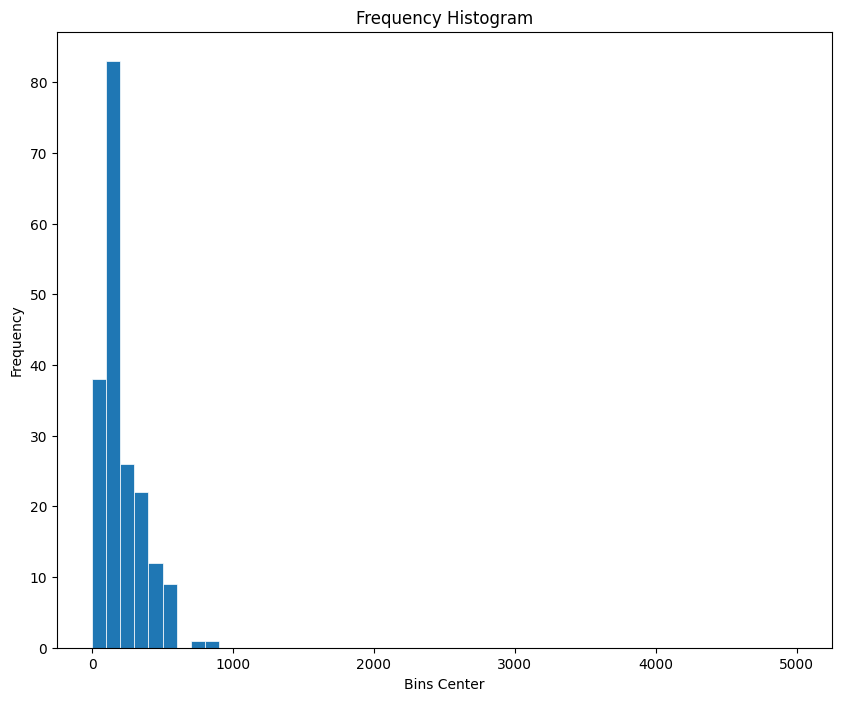

In [77]:
fig, ax = plt.subplots(figsize=(10, 8))
plt.title('Frequency Histogram')
plt.ylabel('Frequency')
plt.xlabel('Bins Center')
ax.hist(extracted_data.Calories.to_numpy(),bins=[0,100,200,300,400,500,600,700,800,900,1000,1000,2000,3000,5000],linewidth=0.5, edgecolor="white")
plt.show()

In [ ]:
final_main_dish = extracted_data.copy()